In [12]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

#import os
#os.getcwd()
#os.chdir(r'D:\New_Life\Notebooks

In [ ]:
dd =pd.date_range(start='1/1/1990', end='31/12/2022')

In [ ]:
years = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],dtype = 'str')
path =r'G:\New_Life_at_IITM\Data\IMD Data sets\IMD Gridded Rainfall (0.25 x 0.25) NetCDF File\_Clim_Pred_LRF_New_RF25_IMD0p252012.nc'

In [ ]:
data = Dataset(path)
time      =  np.array(data['TIME'][:])
lat       =  np.array(data['LATITUDE'][:])
lon       =  np.array(data['LONGITUDE'][:])
rainfall  =  np.array(data['RAINFALL'][:,:,:])

In [ ]:
data['RAINFALL']

In [ ]:
print('shape of rainfall:',rainfall.shape)
print('shape of lat:',lat.shape)
print('shape of lon:',lon.shape)

In [ ]:
rainfall_1 = np.where(rainfall == -999.0, np.nan, rainfall)

In [ ]:
max(rainfall_1[~np.isnan(rainfall_1)])

In [ ]:
print(lon.min(),lon.max())

In [ ]:
print(lat.min(),lat.max())

In [ ]:
np.where(lon == 75)

In [ ]:
num = np.arange(0,366)
area_of_interest_rf = []
for i in num:
    aoi = rainfall_1[i,46:51,34:39]
    area_of_interest_rf.append(aoi)
    
    

In [ ]:
rf = np.array(area_of_interest_rf,dtype = float)

In [ ]:
rf_linear_2012 = rf.mean(axis=(1, 2))

In [ ]:
plt.plot(rf_linear_2012)

# Best way

In [ ]:
dd =pd.date_range(start='1/1/2021', end='31/12/2021')

In [ ]:
path =r'G:\New_Life_at_IITM\Data\IMD Data sets\IMD Gridded Rainfall (0.25 x 0.25) NetCDF File\_Clim_Pred_LRF_New_RF25_IMD0p252021.nc'
data = Dataset(path)
time      =  np.array(data['TIME'][:])
lat       =  np.array(data['LATITUDE'][:])
lon       =  np.array(data['LONGITUDE'][:])
rainfall  =  np.array(data['RAINFALL'][:,:,:])
rainfall_1 = np.where(rainfall == -999.0, np.nan, rainfall)
num = np.arange(0,len(time))
area_of_interest_rf = []
for i in num:
    aoi = rainfall_1[i,46:51,34:39]
    area_of_interest_rf.append(aoi)
rf = np.array(area_of_interest_rf,dtype = float)
rf_linear = rf.mean(axis=(1, 2))
data.close()

In [ ]:
fig=plt.figure(figsize=(16,8))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)

ax1 = plt.subplot()        
ax1.plot(dd,rf_linear,lw=2,c='midnightblue')
ax1.set_ylim(0,75)
# ax1.set_xlim(0,40)
# ax1.legend(loc=1)
# plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
# ax1.set_xticks([0,5,10,15,20,25,30,35])
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.grid(True)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
fig.suptitle('IMD Rainfall Data Gird Averaged for the year 2021',va='center',fontsize=25,fontweight='bold',style='normal',        
         fontname='Arial',y=0.94,x = 0.43)
fig.text(0.06, 0.5, 'Rainfall(mm)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
fig.text(0.45, 0.04, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')

plt.savefig('Osmanabad Rainfall 2021.jpg',bbox_inches='tight',dpi=1080)

In [ ]:
df = pd.read_excel(r'G:\New_Life_at_IITM\Data\Nino Indices\2012_2021.xlsx',usecols = 'C:D')

In [ ]:
months = np.array(df['Months'], dtype = 'datetime64')
indices = np.array(df['Nino3.4'],dtype = 'float')

In [ ]:
fig=plt.figure(figsize=(16,8))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)

ax1 = plt.subplot()        
ax1.plot(months,indices,lw=2,c='red')
ax1.set_ylim(-3.0,3.0)
# ax1.set_xlim(0,40)
# ax1.legend(loc=1)
# plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
# ax1.set_xticks([0,5,10,15,20,25,30,35])
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.grid(True)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
fig.suptitle('The Oceanic Niño Index (ONI)',va='center',fontsize=25,fontweight='bold',style='normal',        
         fontname='Arial',y=0.94,x = 0.43)
fig.text(0.06, 0.5, 'ONI Index(\N{DEGREE SIGN}C)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
fig.text(0.45, 0.04, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')

plt.savefig('The_Oceanic_Niño_Index_2012_2021.jpg',bbox_inches='tight',dpi=1080)

In [1]:
import imdlib as imd

# Downloading 8 years of rainfall data for India
start_yr = 1990
end_yr = 2022
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = 'dataFolder'
"""
fn_format   : str or None
        fn_format represent filename format. 
        Default vales is None.  Which means filesnames are accoding to the IMD naming convention
        If we specify fn_format = 'yearwise', filenames are renamed like <year.grd>

file_dir   : str or None
        Directory for downliading the files.
        If None, the currently working directory is used.

sub_dir : bool
		True : if you need subdirectory for each variable type;
        False: Files will be saved directly under main directory
proxies : dict
        Give details in curly bracket as shown in the example below
        e.g. proxies = { 'http' : 'http://uname:password@ip:port'}
"""
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

Downloading: rain for year 1990
Downloading: rain for year 1991
Downloading: rain for year 1992
Downloading: rain for year 1993
Downloading: rain for year 1994
Downloading: rain for year 1995
Downloading: rain for year 1996
Downloading: rain for year 1997
Downloading: rain for year 1998
Downloading: rain for year 1999
Downloading: rain for year 2000
Downloading: rain for year 2001
Downloading: rain for year 2002
Downloading: rain for year 2003
Downloading: rain for year 2004
Downloading: rain for year 2005
Downloading: rain for year 2006
Downloading: rain for year 2007
Downloading: rain for year 2008
Downloading: rain for year 2009
Downloading: rain for year 2010
Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Downloading: rain for year 2019
Downloading: rain for year 2020
Download

In [2]:
np_array = data.data
import numpy as np
np_array[np_array == -999.0] = np.nan
ds = data.get_xarray()
type(ds)
ds
del data
del np_array

In [ ]:
mea = ds.rain.mean(dim='time')
mea.plot(vmin =0,vmax =5)

In [ ]:
jf   = ds.time.dt.month.isin(range(1, 3))
mam  = ds.time.dt.month.isin(range(3, 6))
jjas = ds.time.dt.month.isin(range(6, 10))
od   = ds.time.dt.month.isin(range(10, 13))

jf_rf   = ds.sel(time=jf)#.mean("time")
mam_rf  = ds.sel(time=mam)#.mean("time")
jjas_rf = ds.sel(time=jjas)#.mean("time")
od_rf   = ds.sel(time=od)#.mean("time")


In [ ]:
jf_rf

In [ ]:
jf_rf.rain[0].plot(vmin =0,vmax =5)

In [ ]:
mam_rf.rain[0].plot(vmin =0,vmax =5)

In [ ]:
jjas_rf.rain[0].plot(vmin =0,vmax =5)

In [ ]:
od_rf.rain[0].plot(vmin =0,vmax =5)

In [ ]:
import os
# import harp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cmcrameri import cm
import requests
# import sentinelsat
# import shutil
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects

In [ ]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())
fname3 = r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm2.shp'
adm1_shapes3 = list(shpreader.Reader(fname3).geometries())

def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([68,98,8,38], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
#     ax.coastlines()
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 2, facecolor='none') #
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='red', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS,lw = 2,edgecolor='red')
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none',lw = 2, edgecolor='red')
    
    ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
#     ax.set_title('IMD Rainfall Jan & Feb Mean from 2010 to 2019' ,fontweight="bold", size=20,family= 'Arial') #jf_rf
#     ax.set_title('IMD Rainfall MAM Mean from 2010 to 2019' ,fontweight="bold", size=20,family= 'Arial') #mam_rf
#     ax.set_title('IMD Rainfall JJAS Mean from 2010 to 2019' ,fontweight="bold", size=20,family= 'Arial') #jjas_rf 
    ax.set_title('IMD Rainfall Oct & Dec Mean from 2010 to 2019' ,fontweight="bold", size=20,family= 'Arial') #od_rf
    filled_c = plt.pcolormesh(jjas_rf.lon, jjas_rf.lat, od_rf.rain, 
                              vmin=0, vmax=5, cmap='viridis', transform=ccrs.PlateCarree())
#     filled_c = plt.imshow( SO2val[0,:,:], vmin=vmin, vmax=vmax, cmap='inferno', transform=ccrs.PlateCarree())
#     ax.plot(lon23102022,lat23102022,markersize=10,marker='^',color='yellow',lw=4,label='23102022')
#     ax.plot(lon24102022,lat24102022,markersize=10,marker='^',color='lime',lw=4,label='24102022')
#     plt.text(76.0420,18.4,'Osmanabad Airport',horizontalalignment='right', color= 'red',fontweight="bold", size=20,family= 'Arial')
#     ax.legend()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(68,98,4))
    gl.ylocator = mticker.FixedLocator(np.arange(8,38,4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'Rainfall(mm)',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
# plt.savefig(r'G:\TROPMET\2010_2019\IMD_RF_JanFeb_mean_2010_2019.jpg',bbox_inches='tight',dpi=360)
# plt.savefig(r'G:\TROPMET\2010_2019\IMD_RF_MAM_mean_2010_2019.jpg',bbox_inches='tight',dpi=360)
# plt.savefig(r'G:\TROPMET\2010_2019\IMD_RF_JJAS_mean_2010_2019.jpg',bbox_inches='tight',dpi=360)
plt.savefig(r'G:\TROPMET\2010_2019\IMD_RF_OctDec_mean_2010_2009.jpg',bbox_inches='tight',dpi=360)
plt.show()

In [4]:
import geopandas as gpd
ind = gpd.read_file(r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm2.shp', crs="epsg:4326")
ind.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', 'geometry'],
      dtype='object')

<Axes: >

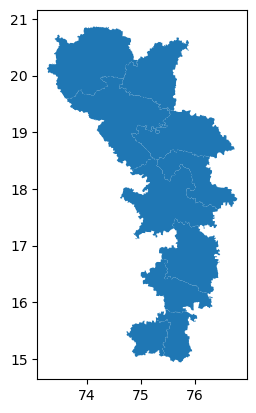

In [39]:
solapur1 = ind[ind['NAME_2']=='Solapur']
bijapur1 = ind[ind['NAME_2']=='Bijapur']
bagalkot1 = ind[ind['NAME_2']=='Bagalkot']
gadag1 = ind[ind['NAME_2']=='Gadag']
dharwad1 = ind[ind['NAME_2']=='Dharwad']
osmanabad1 = ind[ind['NAME_2']=='Osmanabad']
bid1 = ind[ind['NAME_2']=='Bid']
ahmednagar1 = ind[ind['NAME_2']=='Ahmednagar']
aurangabad1 = ind[ind['ID_2'] == 299]

nashik1  = ind[ind['NAME_2']=='Nashik']
# Merge/Combine multiple shapefiles into one
rainshadow = gpd.pd.concat([solapur1,
                            bijapur1,
                            bagalkot1,
                            gadag1,
                            dharwad1,
                            osmanabad1,
                            bid1,
                            ahmednagar1,
                            aurangabad1,
                            nashik1
                           ])
rainshadow.plot()

In [42]:
from shapely.geometry import mapping
import rioxarray as rio
MSWEP_monthly2 = ds.rain
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=False)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = rainshadow#gpd.read_file('Dharashiv.shp', crs="epsg:4326")
clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=False)
del ds
clipped

<xarray.DataArray 'rain' (time: 12053, lat: 129, lon: 135)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat          (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon          (lon) float64 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time         (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2022-12-31
    spatial_ref  int32 0
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [128]:
monthly_means = clipped.resample(time="M").mean()
monthly_means

<xarray.DataArray 'rain' (time: 396, lat: 129, lon: 135)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat          (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon          (lon) float64 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
    spatial_ref  int32 0
  * time         (time) datetime64[ns] 1990-01-31 1990-02-28 ... 2022-12-31
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [129]:
monthly_means_ave = monthly_means.mean(dim = ['lat','lon'],skipna='True',keep_attrs=True)
monthly_means_ave

<xarray.DataArray 'rain' (time: 396)>
array([1.45390642e-01, 2.56187493e-04, 0.00000000e+00, 5.88578048e-02,
       3.88756447e+00, 4.45301212e+00, 2.66860657e+00, 6.62391049e+00,
       2.78782248e+00, 5.62237170e+00, 3.91320683e-01, 7.68478949e-02,
       7.51785832e-03, 1.21529861e-02, 2.08307391e-02, 7.44714781e-01,
       7.90293211e-01, 8.17359417e+00, 4.65317602e+00, 1.71894213e+00,
       2.01777535e+00, 7.01915029e-01, 2.02615943e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.18083578e-05, 1.30058674e-01,
       3.31795766e-01, 4.54219811e+00, 2.77969726e+00, 4.12656104e+00,
       3.81068503e+00, 1.37212305e+00, 1.41904971e+00, 0.00000000e+00,
       0.00000000e+00, 1.14525993e-02, 1.51674416e-01, 1.62571373e-01,
       6.42552485e-01, 2.10098422e+00, 5.01465903e+00, 3.77592957e+00,
       3.98219485e+00, 6.01565144e+00, 2.63334409e-01, 1.46799880e+00,
       1.45811499e-01, 2.42221573e-03, 2.08416883e-03, 6.90312624e-01,
       5.42991045e-01, 3.82189543e+00, 3.80493633e+00, 3.60144572e+00,
       2.04611256e+00, 3.12312074e+00, 7.63063428e-01, 0.00000000e+00,
       8.47599104e-01, 1.21014258e-02, 2.10186476e-01, 2.66338351e-01,
       6.91155581e-01, 2.32306167e+00, 4.23548220e+00, 2.28213081e+00,
       4.95987137e+00, 3.72035652e+00, 2.58616291e-01, 0.00000000e+00,
       6.46527136e-05, 1.30386795e-03, 1.09675051e-03, 3.41695485e-01,
       2.63869050e-01, 3.40737756e+00, 4.43440450e+00, 5.51991294e+00,
...
       6.20398581e-01, 3.56725467e+00, 6.33340814e+00, 3.09963741e+00,
       6.86986323e+00, 2.16461489e+00, 2.67942877e-02, 3.88159526e-02,
       0.00000000e+00, 0.00000000e+00, 1.32588593e-01, 8.21240141e-02,
       5.31489247e-01, 5.73504671e+00, 3.68301984e+00, 5.62031464e+00,
       6.14840499e+00, 4.07936347e+00, 1.05902649e-01, 1.33634457e-01,
       0.00000000e+00, 7.14775581e-02, 9.47684651e-02, 4.90807238e-01,
       9.82216285e-01, 4.41773088e+00, 3.28625175e+00, 3.69663084e+00,
       1.45473449e+00, 5.83005656e-01, 4.67387940e-01, 9.79969652e-03,
       6.19901472e-03, 8.62873886e-03, 7.35624184e-02, 4.11431758e-01,
       2.47203162e-01, 3.19625574e+00, 4.86333382e+00, 4.42469196e+00,
       6.46434118e+00, 7.14032183e+00, 9.93648066e-01, 6.37759462e-02,
       1.04369625e-02, 4.28338144e-03, 3.94990994e-01, 5.06211345e-01,
       9.43791106e-01, 6.78150327e+00, 6.63705197e+00, 4.78218800e+00,
       7.32885882e+00, 4.86419270e+00, 9.65442660e-02, 7.63285611e-02,
       4.39486089e-01, 2.23463313e-01, 1.03172314e-01, 5.67124410e-01,
       1.69256127e+00, 4.43315915e+00, 5.69934456e+00, 4.60705030e+00,
       8.97246874e+00, 3.16744478e+00, 1.39461761e+00, 7.47250284e-01,
       1.45506362e-03, 0.00000000e+00, 1.01659802e-01, 4.23973813e-01,
       1.16408891e+00, 3.81452828e+00, 7.35828063e+00, 4.20785145e+00,
       7.77463044e+00, 5.17552557e+00, 5.25572437e-03, 1.09822817e-01])
Coordinates:
    spatial_ref  int32 0
  * time         (time) datetime64[ns] 1990-01-31 1990-02-28 ... 2022-12-31
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [127]:
jf   = monthly_means_ave.time.dt.month.isin(range(1, 3))
mam  = monthly_means_ave.time.dt.month.isin(range(3, 6))
jjas = monthly_means_ave.time.dt.month.isin(range(6, 10))
od   = monthly_means_ave.time.dt.month.isin(range(10, 13))

jf_rf   = monthly_means_ave.sel(time=jf)#.mean("time")
mam_rf  = monthly_means_ave.sel(time=mam)#.mean("time")
jjas_rf = monthly_means_ave.sel(time=jjas)#.mean("time")
od_rf   = monthly_means_ave.sel(time=od)#.mean("time")

In [ ]:
dhar2 = dhar1.to_dataframe()
dhar2.to_excel(r'G:\TROPMET\Dharwad_IMD_rf_1990_2022.xlsx')

In [69]:
print(monthly_means_ave.to_dataframe())
nin.shape

            spatial_ref      rain
time                             
1990-01-31            0  0.145391
1990-02-28            0  0.000256
1990-03-31            0  0.000000
1990-04-30            0  0.058858
1990-05-31            0  3.887564
...                 ...       ...
2022-08-31            0  4.207851
2022-09-30            0  7.774630
2022-10-31            0  5.175526
2022-11-30            0  0.005256
2022-12-31            0  0.109823

[396 rows x 2 columns]


(396, 2)

In [72]:
nina_rf = pd.concat([monthly_means_ave.to_dataframe(), nin], axis=1)
nina_rf.to_excel(r'G:\key papers\RainShadowRegionPapers\try1.xlsx')

In [ ]:
import matplotlib.pyplot as plt

import os
# import harp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cmcrameri import cm
# import requests
# import sentinelsat
# import shutil
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects


fig=plt.figure(figsize = (12,8))
ax1=fig.add_subplot(111, label="1", frame_on=True)
ax2=fig.add_subplot(111, label="2", frame_on=False)
# ax3=fig.add_subplot(111, label="3", frame_on=False)

ax1.scatter(art_mean.time,art_mean,label='Rainfall', color="C0",lw=4)
ax1.set_xlabel("Date", color="C0")
ax1.set_ylabel("Rainfall", color="C0")
ax1.tick_params(axis='x', colors="C0")
ax1.tick_params(axis='y', colors="C0")

ax1.plot(nin['Month'],nin['Nino3.4'],label='Nino 3.4', color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Date', color="C1") 
ax2.set_ylabel('Nino 3.4', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

ax1.spines['bottom'].set_color("C0")
ax1.spines['top'].set_color('C1')
ax1.spines['right'].set_color('C1')
ax1.spines['left'].set_color("C0")



ax1.legend("HHZ 1",loc="upper right")
ax2.legend("HHN",loc="upper left")
plt.show()

# HadISST

In [130]:
import pandas as pd
nin = pd.read_excel(r'E:\Nino3.4_1979_2022.xlsx',usecols='P:Q',parse_dates=['Month'])
rf = pd.read_excel(r'G:\TROPMET\rainshadow_IMD_rf_1990_2022.xlsx',usecols='A:F',parse_dates=['time'])
nin.columns

Index(['Month', 'Nino3.4'], dtype='object')

In [33]:
rf.columns

Index(['time', 'Bhatkal', 'Bijapur', 'Dharwad', 'Gadag', 'Solapur'], dtype='object')

In [17]:
# nin['Month'] = pd.to_datetime(nin['Month'], format='%Y%b%d') 
# rf['Month'] = pd.to_datetime(rf['time'], format='%Y%b%d') 

In [ ]:
plt.plot(nin['Month'][504:626],nin['Index'][504:626],label='Nino 3.4', color="C1")

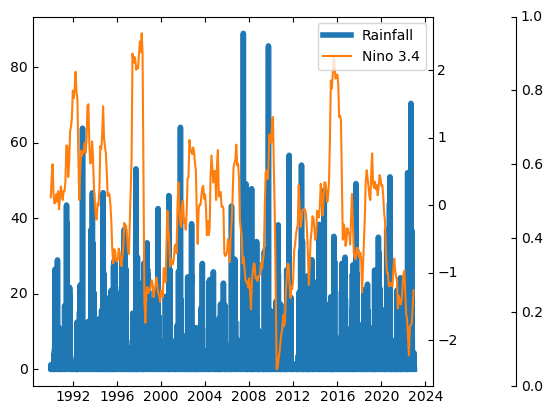

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

p1, = host.plot(rf.time,rf.Bhatkal,label='Rainfall', color="C0",lw=4)
p2, = par1.plot(nin['Month'],nin['Nino3.4'],label='Nino 3.4', color="C1" )
# p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

# host.set(xlim=(nin['Month'],nin['Month']),  xlabel="Distance", ylabel="Density") #ylim=(0, 2),
# par1.set(ylim=(0, 4), ylabel="Temperature")
# par2.set(ylim=(1, 65), ylabel="Velocity")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right"].label.set_color(p3.get_color())

plt.show()

# extracting seasonal data  from data frame 

In [60]:
janfeb   = rf.time.dt.month.isin(range(1, 3))
mamay  = rf.time.dt.month.isin(range(3, 6))
jjasep = rf.time.dt.month.isin(range(6, 10))
odec   = rf.time.dt.month.isin(range(10, 13))

jf = rf[janfeb]
mam = rf[mamay]
jjas = rf[jjasep]
od = rf[odec]

In [61]:
jf1= jf.reset_index()
mam1 = mam.reset_index()
jjas1 = jjas.reset_index()
od1 = od.reset_index()

In [71]:
jf1.to_excel('jf1.xlsx')
mam1.to_excel('mam1.xlsx')
jjas1.to_excel('jjas1.xlsx')
od1.to_excel('od1.xlsx')

In [122]:
#jf
print('Jan-Feb Start:',jf1.time[jf1.time == '1990-01-01'])
print('Jan-Feb End:',jf1.time[jf1.time == '1999-02-28'])
#mam
print('M-A-M Start:',mam1.time[mam1.time == '1990-03-01'])
print('M-A-M End:',mam1.time[mam1.time == '1999-05-31'])
#jjas
print('J-J-A-S Start:',jjas1.time[jjas1.time == '1990-06-01'])
print('J-J-A-S End:',jjas1.time[jjas1.time == '1999-09-30'])
# OND
print('O-N-D Start:',od1.time[od1.time == '1990-10-01'])
print('O-N-D End:',od1.time[od1.time == '1999-12-31'])


Jan-Feb Start: 0   1990-01-01
Name: time, dtype: datetime64[ns]
Jan-Feb End: 591   1999-02-28
Name: time, dtype: datetime64[ns]
M-A-M Start: 0   1990-03-01
Name: time, dtype: datetime64[ns]
M-A-M End: 919   1999-05-31
Name: time, dtype: datetime64[ns]
J-J-A-S Start: 0   1990-06-01
Name: time, dtype: datetime64[ns]
J-J-A-S End: 1219   1999-09-30
Name: time, dtype: datetime64[ns]
O-N-D Start: 0   1990-10-01
Name: time, dtype: datetime64[ns]
O-N-D End: 919   1999-12-31
Name: time, dtype: datetime64[ns]


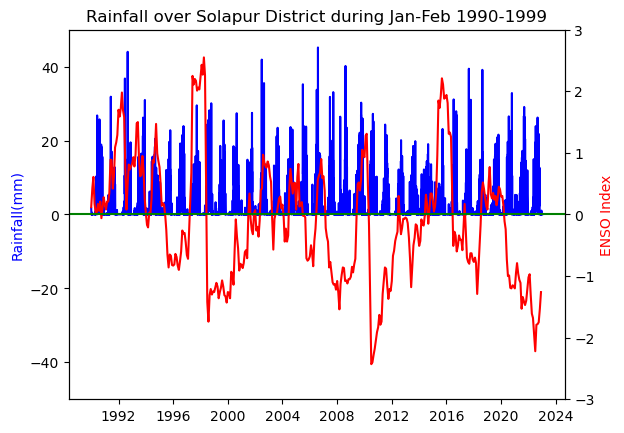

In [57]:
import numpy as np
import matplotlib.pyplot as plt
x1 = nin['Month']#[0:119]
x2 = dhar1.time#jf1.time[0:591]
y1 = nin['Nino3.4']#[0:119]
y2 = dhar1#jf1.Solapur[0:591]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(x1, y1, 'red')
ax1.plot(x2, y2,c= 'blue')
ax1.set_ylim([-50, 50])
ax2.set_ylim([-3, 3])
ax2.axhline(y = 0, color = 'green', linestyle = '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('ENSO Index', color='red')
ax1.set_ylabel('Rainfall(mm)', color='b')
plt.title('Rainfall over Solapur District during Jan-Feb 1990-1999')
# plt.savefig(r'G:\TROPMET\Solapur_IMD_Rainfall_Jan-Feb_1990-1999.jpg',bbox_inches='tight',dpi=360)
plt.show()

In [131]:
n_rf= pd.read_excel(r'G:\TROPMET\NINO34_IMD_rs_rainfall_monthly.xlsx')
n_rf

,Month,rain,Nino3.4
0,1990-01-31,0.145391,0.12
1,1990-02-28,0.000256,0.43
2,1990-03-31,0.000000,0.61
3,1990-04-30,0.058858,0.17
4,1990-05-31,3.887564,0.03
...,...,...,...
391,2022-08-31,4.207851,-1.79
392,2022-09-30,7.774630,-1.78
393,2022-10-31,5.175526,-1.75
394,2022-11-30,0.005256,-1.53


In [138]:
janfeb   = n_rf.Month.dt.month.isin(range(1, 3))
mamay  = n_rf.Month.dt.month.isin(range(3, 6))
jjasep = n_rf.Month.dt.month.isin(range(6, 10))
odec   = n_rf.Month.dt.month.isin(range(10, 13))

jf = n_rf[janfeb]
mam = n_rf[mamay]
jjas = n_rf[jjasep]
od = n_rf[odec]

In [141]:
mam

,Month,rain,Nino3.4
2,1990-03-31,0.000000,0.61
3,1990-04-30,0.058858,0.17
4,1990-05-31,3.887564,0.03
14,1991-03-31,0.020831,0.21
15,1991-04-30,0.744715,0.21
...,...,...,...
375,2021-04-30,0.567124,-0.96
376,2021-05-31,1.692561,-1.06
386,2022-03-31,0.101660,-1.30
387,2022-04-30,0.423974,-1.61


In [166]:
# la_weak1 = (n_rf['Nino3.4'] > -1) & (n_rf['Nino3.4'] < -0.5)   
# la_mod1 = (n_rf['Nino3.4'] > -1.5) & (n_rf['Nino3.4'] < -1)
# la_strong1 = (n_rf['Nino3.4'] > -2) & (n_rf['Nino3.4'] < -1.5)
# el_weak1 = (n_rf['Nino3.4'] > 0.5) & (n_rf['Nino3.4'] < 1)
# el_mad1 = (n_rf['Nino3.4'] > 1) & (n_rf['Nino3.4'] < 1.5)
# el_strong1 = (n_rf['Nino3.4'] > 1.5) & (n_rf['Nino3.4'] < 2)
# el_vstrong1 = (n_rf['Nino3.4'] > 2) & (n_rf['Nino3.4'] < 2.5)


# la_weak = n_rf.loc[la_weak1]
# la_mod = n_rf.loc[la_mod1]
# la_strong = n_rf.loc[la_strong1]
# el_weak = n_rf.loc[el_weak1]
# el_mad = n_rf.loc[el_mad1]
# el_strong = n_rf.loc[el_strong1]
# el_vstrong = n_rf.loc[el_vstrong1]



mam_el1 = (mam['Nino3.4'] > 0.5)
mam_el = mam.loc[mam_el1]
mam_nel1 = (mam['Nino3.4'] < 0.5)
mam_nel = mam.loc[mam_nel1]

jjas_el1 = (jjas['Nino3.4'] > 0.5)
jjas_el = jjas.loc[jjas_el1]
jjas_nel1 = (jjas['Nino3.4'] < 0.5)
jjas_nel = jjas.loc[jjas_nel1]

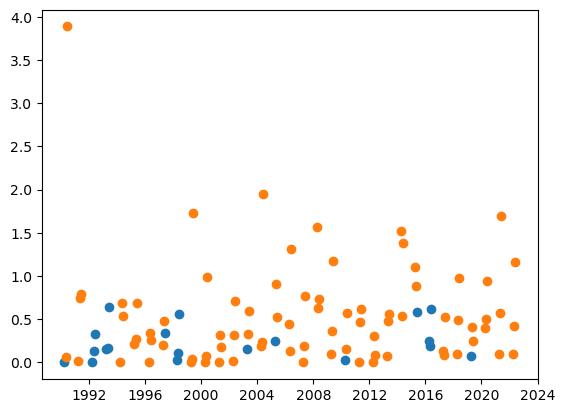

In [148]:
plt.scatter(mam_el['Month'],mam_el['rain'])
plt.scatter(mam_nel['Month'],mam_nel['rain'])
# plt.plot(el_weak['Month'],el_weak['Nino3.4'])

In [167]:
mam_el_data = pd.concat([mam_el['Month'],mam_el['rain']],axis = 1)
mam_nel_data = pd.concat([mam_nel['Month'],mam_nel['rain']],axis = 1)
jjas_el_data = pd.concat([jjas_el['Month'],jjas_el['rain']],axis = 1)
jjas_nel_data = pd.concat([jjas_nel['Month'],jjas_nel['rain']],axis = 1)
jjas_nel_data


 

,Month,rain
5,1990-06-30,4.453012
6,1990-07-31,2.668607
7,1990-08-31,6.623910
8,1990-09-30,2.787822
19,1991-08-31,1.718942
...,...,...
380,2021-09-30,8.972469
389,2022-06-30,3.814528
390,2022-07-31,7.358281
391,2022-08-31,4.207851


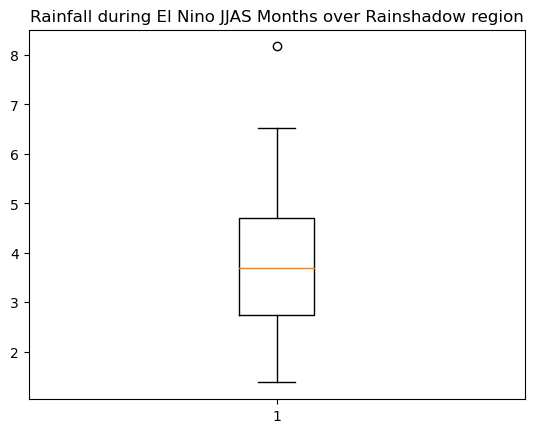

In [168]:
plt.boxplot(jjas_el_data['rain'])
plt.title('Rainfall during El Nino JJAS Months over Rainshadow region')
plt.savefig(r'G:\TROPMET\jjas_elnino_rf.jpg')

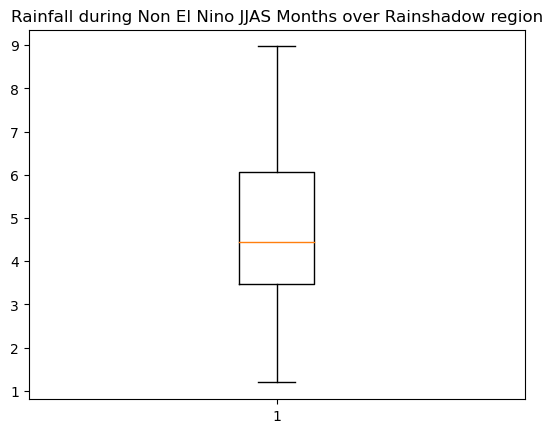

In [169]:
plt.boxplot(jjas_nel_data['rain'])
plt.title('Rainfall during Non El Nino JJAS Months over Rainshadow region')
plt.savefig(r'G:\TROPMET\jjas_nelnino_rf.jpg')

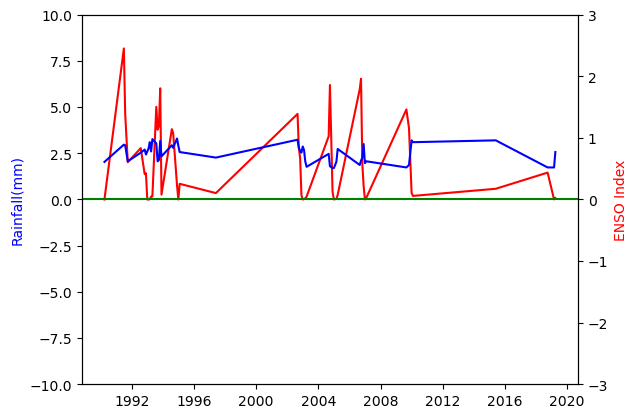

In [107]:
import numpy as np
import matplotlib.pyplot as plt
x1 = el_weak['Month']
x2 = el_weak['Month']
y1 = el_weak['rain']
y2 = el_weak['Nino3.4']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x1, y1, 'red') # Rain
ax2.plot(x2, y2,c= 'blue')
ax1.set_ylim([-10, 10])
ax2.set_ylim([-3, 3])
ax2.axhline(y = 0, color = 'green', linestyle = '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('ENSO Index', color='red')
ax1.set_ylabel('Rainfall(mm)', color='b')
# plt.title('Rainfall over Solapur District during Jan-Feb 1990-1999')
# plt.savefig(r'G:\TROPMET\Solapur_IMD_Rainfall_Jan-Feb_1990-1999.jpg',bbox_inches='tight',dpi=360)
plt.show()